# Manav Sehgal's Solution for Titanic
[https://computer-science-student.tistory.com/113] [https://www.kaggle.com/code/startupsci/titanic-data-science-solutions/notebook]

## 필요한 라이브러리 설치

pandas, numpy, seaborn, matplotlib, scikit-learn을 pip install 통해서 설치해야 함.

In [89]:
# 데이터 불러오기
import pandas as pd
import numpy as np
import random as rnd

In [90]:
# 시각화
import seaborn as sns   # matplotlib 기반 통계 차트 패키지 
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
import warnings
warnings.filterwarnings(action='ignore')

## 데이터 셋 불러오기 & 데이터셋 확인

### 데이터셋 (Feature) 불러오기

In [93]:
train_df=pd.read_csv("./train.csv")   # training data
test_df=pd.read_csv("./test.csv")     # validation data
# 모델 적용의 일관성을 위해,
# train과 test를 합한 combine 데이터 셋도 지정
combine=[train_df,test_df]

### 데이터셋 (Feature) 확인

* PassengerID: 각 승객의 고유번호
* Survived: 생존 여부 (종속 변수)
  * dead: 0
  * alive: 1
* Pclass: 객실 등급 - 승객의 사회/경제적 지위
  * 1st: 1 (Higher)
  * 2nd: 2
  * 3rd: 3 (Lower)
* Name
* Sex
* Age
* SibSP: Sibling & Spouse (형제자매, 배우자 수)
* Parch: Parent & Child (부조, 자식 수)
* Ticket: 티켓 고유번호
* Fare: 티켓 요금
* Cabin: 객실 번호
* Embarked: 승선한 항구명
  * Cherbourg: C (쉘부르)
  * Queenstown: Q (퀸즈타운)
  * Southampton: S (사우스햄튼)

In [94]:
# 변수 보기
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [95]:
# 데이터 미리 보기
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [96]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [97]:
# 훈련 자료 정보
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [98]:
# 테스트 자료 정보
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 데이터 분석 

### 데이터 통계치 확인

In [99]:
# 훈련 자료 int, float 변수 통계치
train_df.describe()     # default is only for numeric data
# train_df.describe(include=['number'])   # number, numeric data


# pandas dataframe_object.describe()
# count:
# mean: 평균
# std: 
# min:
# 25%:
# 50%:
# 75%:
# max:

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


```python
train_df.describe()의 출력 결과에 따르면...
(train_df.describe(include=['number'])과 동일함)
```
* training data
  * 데이터(sample) 수: 891개
  * 생존률: 38.4%
  * 평균 나이: 29.7세
  * 평균 형제자매,배우자 수: 0.5명
  * 평균 티켓 요금: 32.2파운드
 

In [100]:
# 훈련 자료 object 변수 통계치
train_df.describe(include=['O'])    # 'O': object

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


```python
train_df.describe(include=['O'])의 출력 결과에 따르면...
  count: 전체 데이터 갯수
  unique: 고유값 데이터 갯수
  top: most commom value(aka.Mode): 최빈값
  freq: most common value's frequency: 최빈값이 얼마나 많이 나오는지(최빈값의 빈도)
```
* training data
  * 남성 수: 577명
    성별 최빈값(sex-top): male
    성별 최빈값의 빈도(sex-freq): 577
  * 가장 많은 승선지: 사우스햄튼, 644명
    승선지 최빈값(embarked-top): S
    승선지 최빈값의 빈도(embarked-freq): 644
 

In [101]:
# numeric과 object 모두에 대한 통계치 출력
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### 객실 등급(Pclass)에 따른 생존률 비교
-> **객실 등급이 높을수록 생존률이 높다**

In [102]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
# train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False)

# groupby()에 as_index = False: Pclass를 index로 사용하지 않음
# ascending : 오름차순
# as_index를 True로 하면 Pclass를 index로 사용

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### 성별(Sex)에 따른 생존률 비교
-> **여성의 생존률 남성보다 높다**

In [103]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


### 승선한 형제 자매, 배우자수(SibSp)에 따른 생존률 비교
-> **동행이 적을수록 생존률이 높은 경향이 있다??**

In [104]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


### 승선한 부모 자식 수(Parch)에 따른 생존률 비교
-> **동행이 적을수록 생존률이 높은 경향이 있다??**

In [105]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


### 생존 여부(Survived)에 따른 연령(Age) 분포 비교 [그래프]

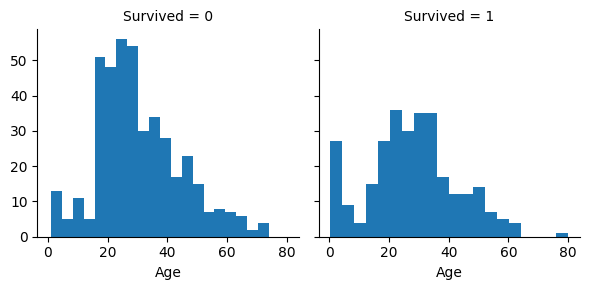

In [106]:
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin(폭)을 20개로 설정
g.map(plt.hist, 'Age', bins=20)

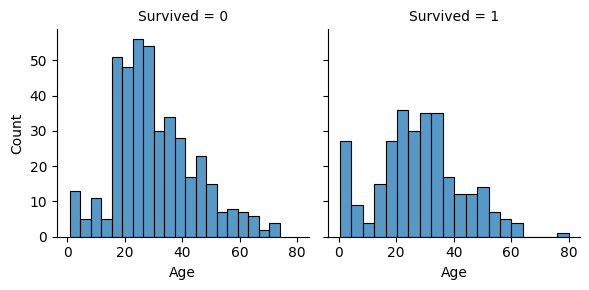

In [107]:
# 열(col)을 생존 여부로 나눔
g = sns.FacetGrid(train_df, col='Survived')
# 히스토그램으로 시각화, 연령의 분포를 확인, 히스토그램 bin(폭)을 20개로 설정
g.map(sns.histplot, 'Age', bins=20)     # plt에서 기본 제공해 주는 histogram 보다 sns쓰는게 이쁘긴 하네.

### 승선지(Embarked)와 객실 등급(Pclass)에 따른 생존률(Survived) [그래프]
-> **여성 인 경우 남성보다 생존률이 높다**
-> **남성의 경우 승선지가 Cherbourg라면 **

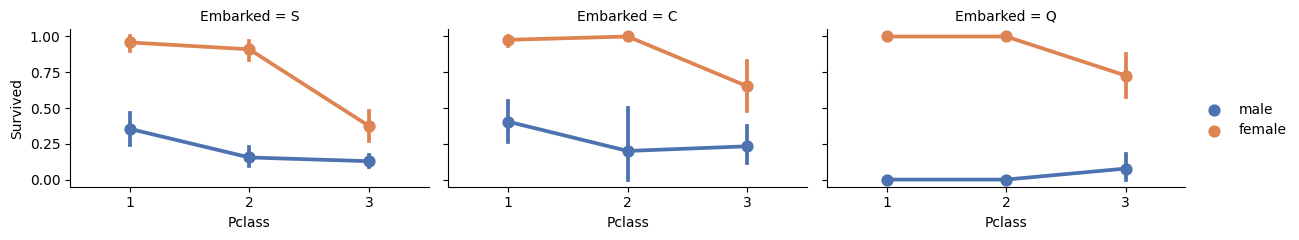

In [127]:
# 행(row)을 탑승지로 나눔
grid = sns.FacetGrid(train_df, col='Embarked', height=2.5, aspect=1.6)

# Pointplot으로 꺾은선 시각화
# x: 객실 등급, y: 생존 여부
# 꺾은선 색상: 성별
# x축 순서(order): [1, 2, 3]
# 색깔 순서(hue_order): [남성, 여성]
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep', order = [1, 2, 3], hue_order = ["male", "female"])

# 범례 추가
grid.add_legend()   #legend: 범례

### 승선지(Embark)와 생존여부(Survived), 성별(Sex)에 따른 요금(Fare)

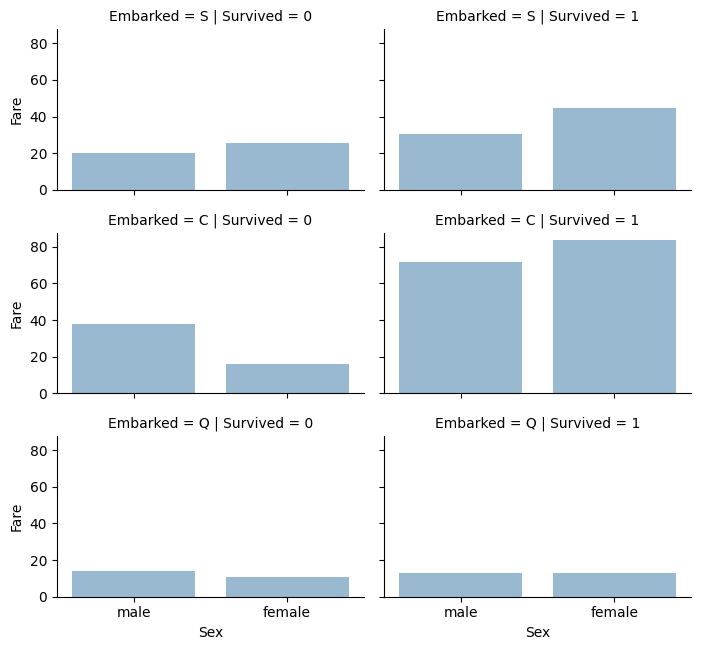

In [126]:
# 행(row)을 탑승지로, 열(col)을 생존 여부로 나눔
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)

# 바그래프로 시각화, x: 성별, y: 요금, Error bar: 표시 안 함
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None,order=["male","female"])

grid.add_legend()